In [5]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("/content/drive/MyDrive/생성형 AI를 이용한 빅데이터 분석/penguins.csv")

# 데이터 기본 구조 확인
print(df.head())      # 처음 5행
print(df.info())      # 데이터 타입/결측치
print(df.describe())  # 수치형 요약 통계


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      3

In [6]:
# 수치형 변수 기술통계
print(df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].describe())

# 범주형 변수 빈도
print(df["species"].value_counts())
print(df["island"].value_counts())
print(df["sex"].value_counts())


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
male      168
female    165
Name: count, dtype: int64


In [7]:
# 각 컬럼별 결측치 개수
print(df.isnull().sum())

# 결측치 비율
print(df.isnull().mean() * 100)


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
year                 0.000000
dtype: float64


In [9]:
df = df.dropna()


In [10]:
# 각 컬럼별 결측치 개수
print(df.isnull().sum())

# 결측치 비율
print(df.isnull().mean() * 100)


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64
species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
year                 0.0
dtype: float64


In [11]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


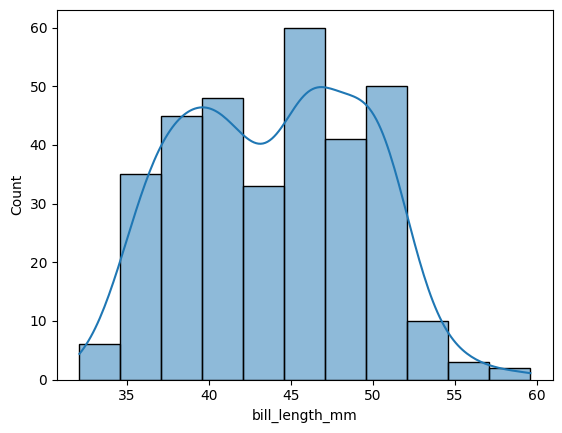

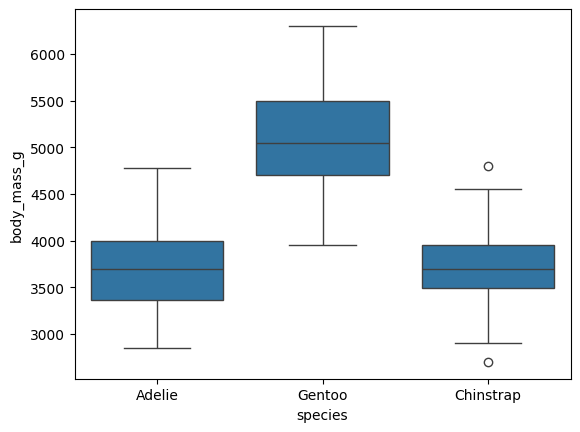

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
sns.histplot(df["bill_length_mm"], kde=True)
plt.show()

# 박스플롯
sns.boxplot(x="species", y="body_mass_g", data=df)
plt.show()


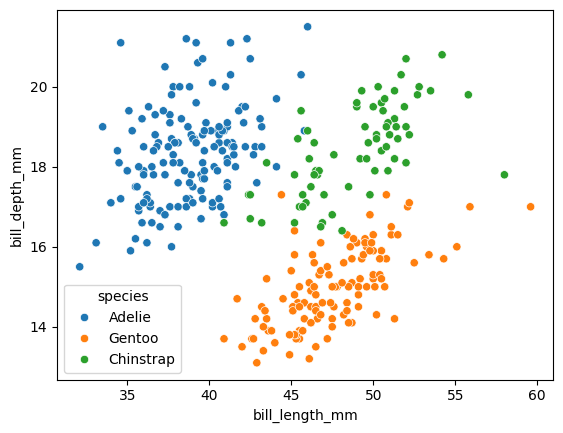

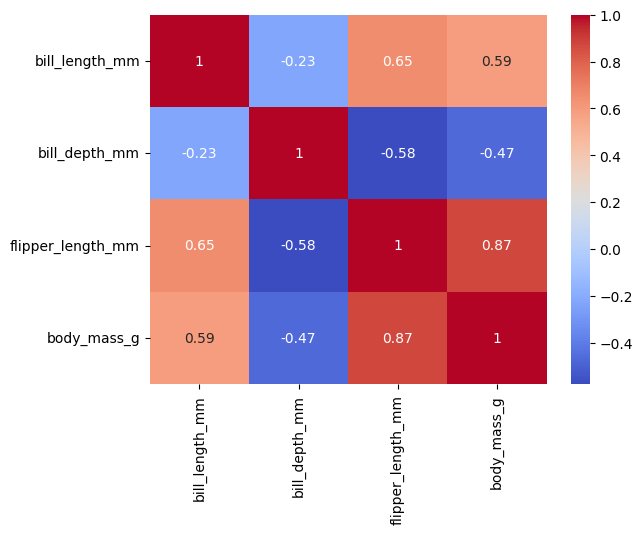

In [13]:
# 산점도 (부리 길이 vs 깊이, 종별 색상)
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.show()

# 상관계수 히트맵
corr = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [14]:
# 종별 평균/표준편차
print(df.groupby("species")[["bill_length_mm","flipper_length_mm","body_mass_g"]].agg(["mean","std","min","max"]))

# 성별 평균
print(df.groupby("sex")[["body_mass_g"]].mean())


          bill_length_mm                       flipper_length_mm            \
                    mean       std   min   max              mean       std   
species                                                                      
Adelie         38.823973  2.662597  32.1  46.0        190.102740  6.521825   
Chinstrap      48.833824  3.339256  40.9  58.0        195.823529  7.131894   
Gentoo         47.568067  3.106116  40.9  59.6        217.235294  6.585431   

                         body_mass_g                              
             min    max         mean         std     min     max  
species                                                           
Adelie     172.0  210.0  3706.164384  458.620135  2850.0  4775.0  
Chinstrap  178.0  212.0  3733.088235  384.335081  2700.0  4800.0  
Gentoo     203.0  231.0  5092.436975  501.476154  3950.0  6300.0  
        body_mass_g
sex                
female  3862.272727
male    4545.684524


# Pairplot 생성
> "모든 변수 간 관계를 한 번에 봅시다.

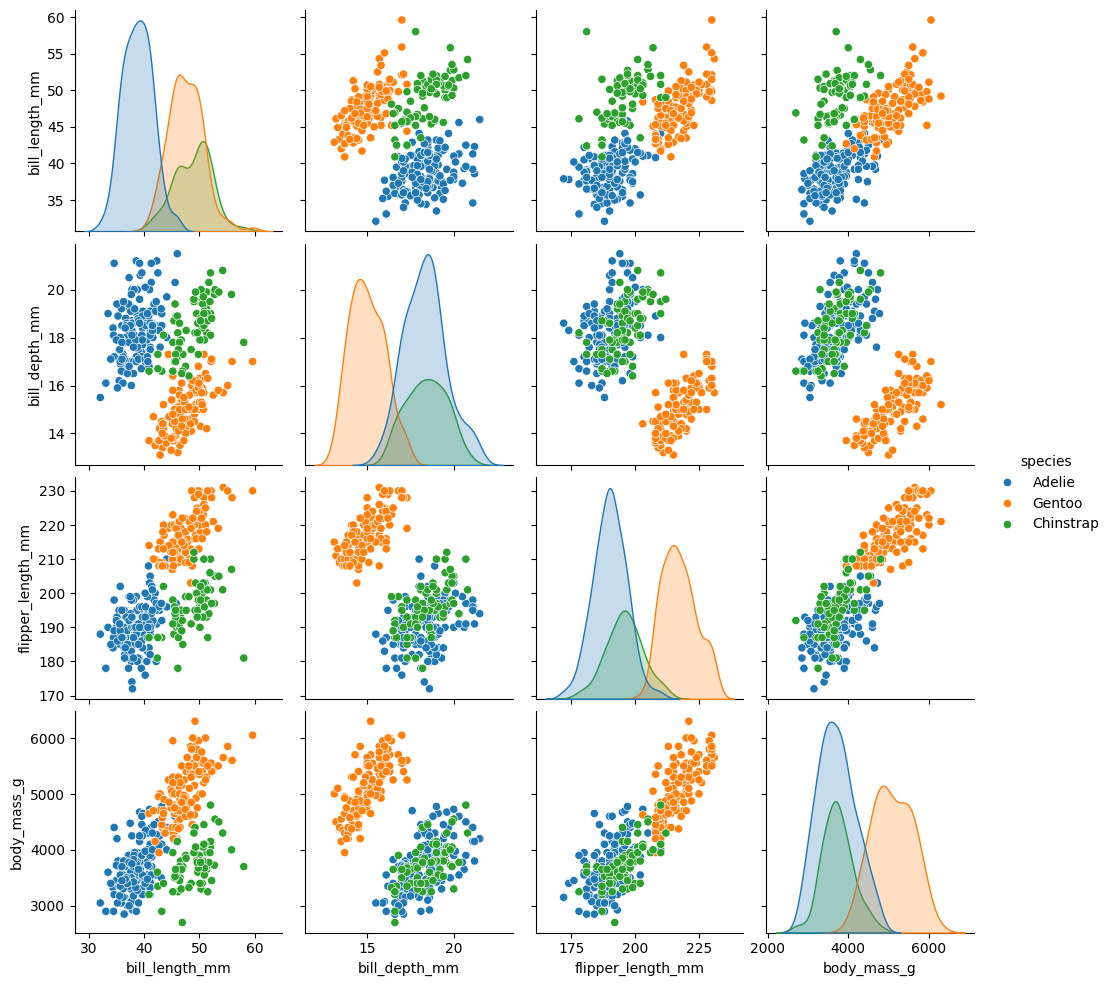

In [15]:
sns.pairplot(penguins_clean[['bill_length_mm', 'bill_depth_mm',
                              'flipper_length_mm', 'body_mass_g', 'species']],
             hue='species')
plt.show()